# 4주차 모델링1 과제 - 성지수

In [4]:
#기본 라이브러리
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
from fancyimpute import IterativeImputer
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #plot내 글씨를 선명하게 해주는 옵션
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [3]:
# working directory 확인
os.getcwd()

'C:\\Users\\jisoo sung\\비어플과제'

In [5]:
# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 데이터 확인
print("Train 데이터 크기:", train.shape)
print("Test 데이터 크기:", test.shape)

# Train 데이터의 처음 몇 행 확인
train.head()

Train 데이터 크기: (8040, 14)
Test 데이터 크기: (720, 13)


,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       720 non-null    object 
 1   Hour                       720 non-null    int64  
 2   Temperature(째C)            644 non-null    float64
 3   Humidity(%)                720 non-null    int64  
 4   Wind speed (m/s)           646 non-null    float64
 5   Visibility (10m)           720 non-null    int64  
 6   Dew point temperature(째C)  720 non-null    float64
 7   Solar Radiation (MJ/m2)    720 non-null    float64
 8   Rainfall(mm)               720 non-null    float64
 9   Snowfall (cm)              720 non-null    float64
 10  Seasons                    646 non-null    object 
 11  Holiday                    720 non-null    object 
 12  Functioning Day            720 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 7

# EDA
- train data 
- test data

In [8]:
#중복 행 확인 _ 없음
train[train.duplicated()]
test[test.duplicated()]

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


# 결측치
## train data : 
- Temperature _800개
- Wind speed (m/s)_802개
- Seasons _802개
결측치 존재

## test data : 
- Temperature _76개
- Wind speed (m/s) _74개
- Seasons _74개
결측치 존재

In [9]:
# train data 결측치
train.isna().sum().sort_values()

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Temperature(째C)              800
Wind speed (m/s)             802
Seasons                      802
dtype: int64

In [10]:
# test data 결측치
test.isna().sum().sort_values()

Date                          0
Hour                          0
Humidity(%)                   0
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Holiday                       0
Functioning Day               0
Wind speed (m/s)             74
Seasons                      74
Temperature(째C)              76
dtype: int64

In [11]:
# 데이터를 날짜와 시간대로 정렬
train.sort_values(by=['Date', 'Hour'], inplace=True)
test.sort_values(by=['Date', 'Hour'], inplace=True)

In [12]:
# 'Time' 변수 생성 _ 시간대
train['Time'] = ''
train.loc[(train['Hour'] >=0) & (train['Hour'] < 6), 'Time'] = '새벽'
train.loc[(train['Hour'] >=6) & (train['Hour'] < 12), 'Time'] = '아침'
train.loc[(train['Hour'] >=12) & (train['Hour'] < 18), 'Time'] = '낮'
train.loc[(train['Hour'] >=18) , 'Time'] = '밤'

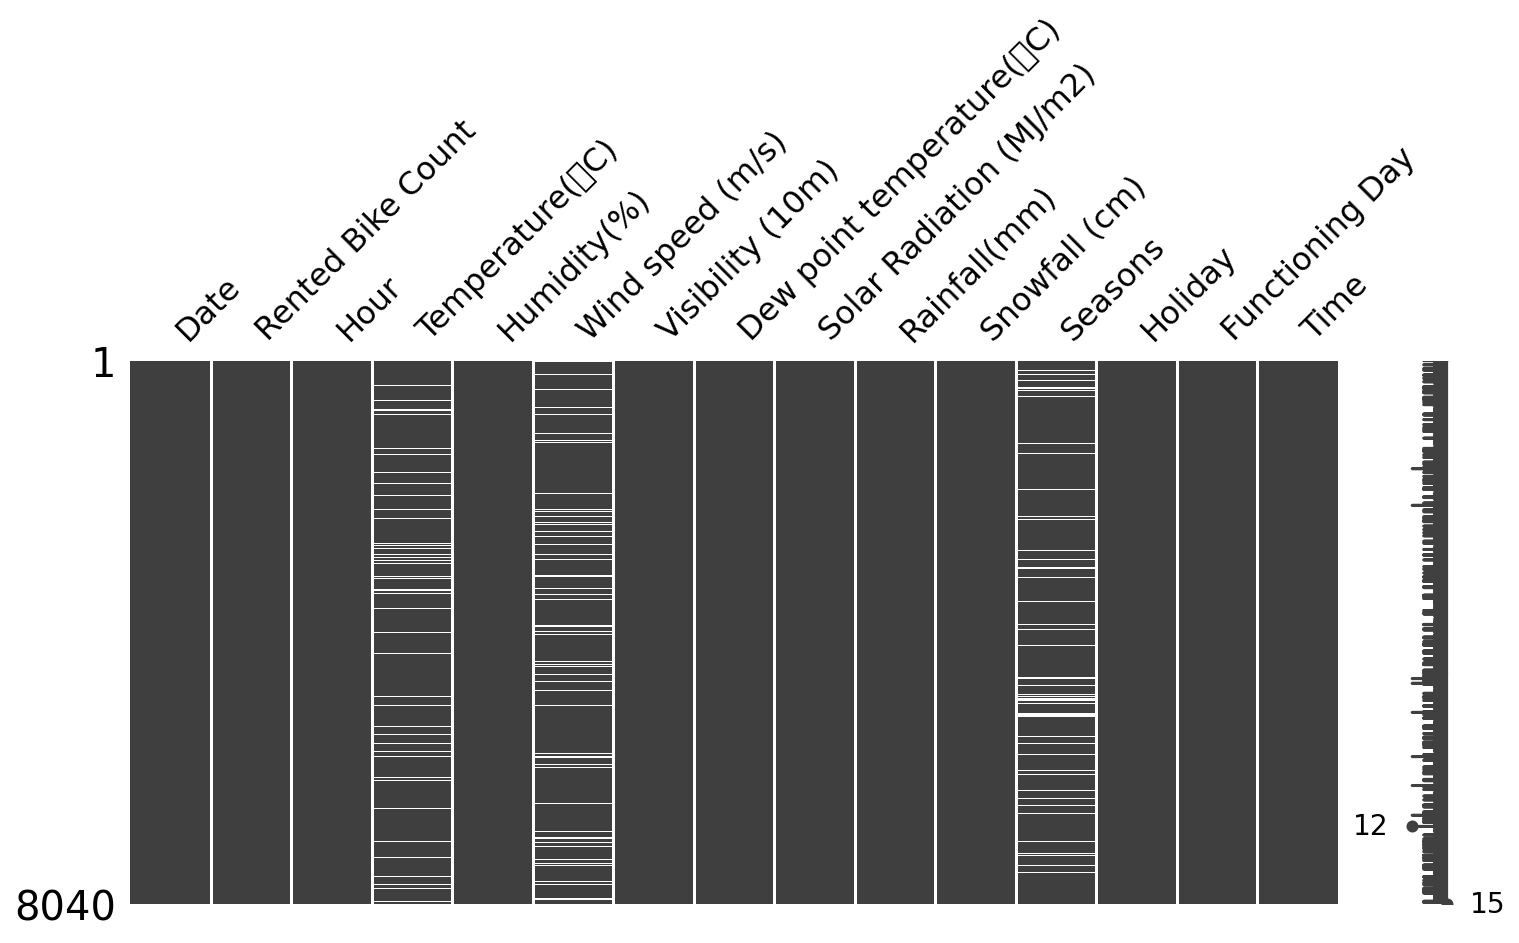

<AxesSubplot:>

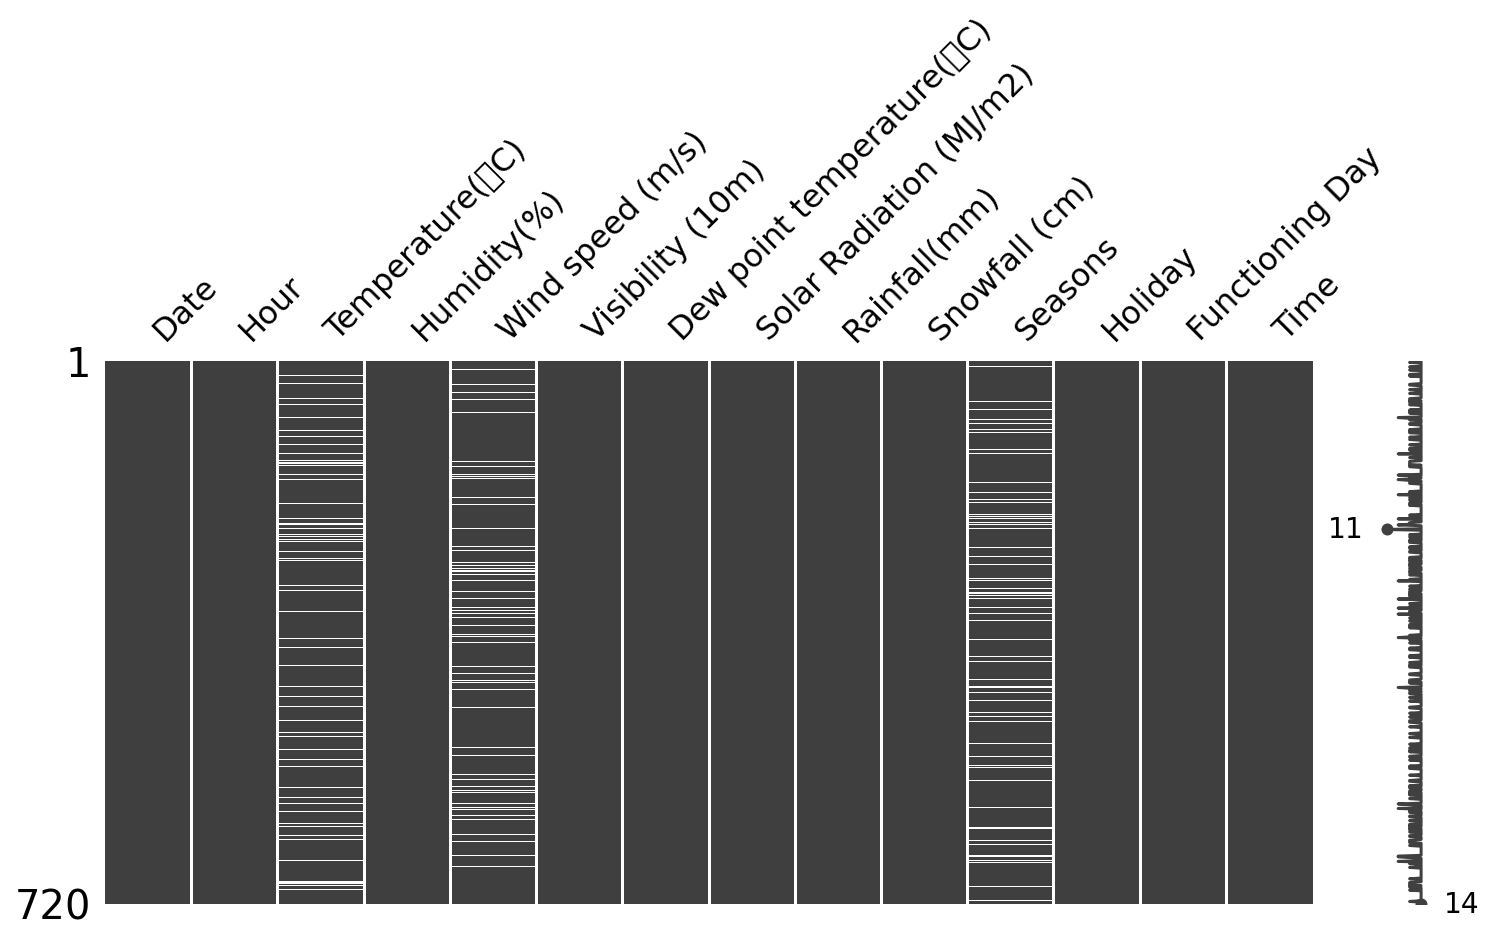

In [13]:
msno.matrix(train, figsize=(12,5))
plt.show()
msno.matrix(test, figsize=(12,5))

In [107]:
# train 데이터 복사 _df1
df1 = train.copy()

# test 데이터 복사 _df2
df2 = test.copy()

# 'Date' 변수를 datetime 형식으로 변환
df1['Date'] = pd.to_datetime(df1['Date'],format='%d/%m/%Y')
df2['Date'] = pd.to_datetime(df2['Date'],format='%d/%m/%Y')

In [15]:
df1['Date']

744   2018-01-01
745   2018-01-01
746   2018-01-01
747   2018-01-01
748   2018-01-01
         ...    
739   2017-12-31
740   2017-12-31
741   2017-12-31
742   2017-12-31
743   2017-12-31
Name: Date, Length: 8040, dtype: datetime64[ns]

In [16]:
df2['Date']

0     2018-11-01
1     2018-11-01
2     2018-11-01
3     2018-11-01
4     2018-11-01
         ...    
715   2018-11-30
716   2018-11-30
717   2018-11-30
718   2018-11-30
719   2018-11-30
Name: Date, Length: 720, dtype: datetime64[ns]


# Functioning Day : 대여소 운영여부
- Yes / No
- train/ test : 대체로 봄/가을에 운영을 안하는 날 몰려있음
- train : 공휴일보다 공휴일이 아닌 날 운영을 안하는 날이 많음
- test : 운영을 안하는 날은 모두 공휴일이 아닌 날
- 운영하지 않는 날에 대한 다른 변수들의 패턴은 존재하지 않음 

In [17]:
print(df1['Functioning Day'].value_counts())
print(df2['Functioning Day'].value_counts())

Yes    7817
No      223
Name: Functioning Day, dtype: int64
Yes    648
No      72
Name: Functioning Day, dtype: int64


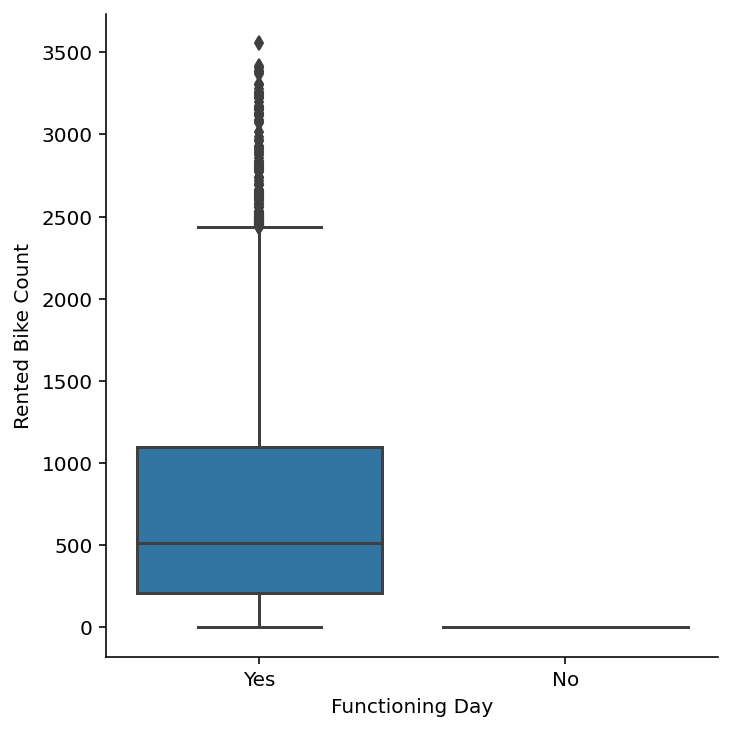

In [18]:
sns.catplot(x='Functioning Day', y='Rented Bike Count', data=df1, kind='box')

In [19]:
# 운영을 안하는 날
no1 = df1[df1['Functioning Day']== 'No']
no2 = df2[df2['Functioning Day']== 'No']

In [20]:
print(no1['Seasons'].value_counts())
print(no2['Seasons'].value_counts())

Autumn    156
Spring     45
Name: Seasons, dtype: int64
Autumn    63
Name: Seasons, dtype: int64


In [21]:
print(no1['Holiday'].value_counts())
print(no2['Holiday'].value_counts())

No Holiday    199
Holiday        24
Name: Holiday, dtype: int64
No Holiday    72
Name: Holiday, dtype: int64


In [22]:
# 운영하지 않는 날(no)의 다른 변수
df1[df1['Functioning Day']=='No']

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
7320,2018-10-02,0,0,13.0,72,1.8,1987,8.0,0.0,0.0,0.0,Autumn,No Holiday,No,새벽
7321,2018-10-02,0,1,NaN,74,1.9,1992,7.9,0.0,0.0,0.0,Autumn,No Holiday,No,새벽
7322,2018-10-02,0,2,12.3,75,1.6,1840,7.9,0.0,0.0,0.0,Autumn,No Holiday,No,새벽
7323,2018-10-02,0,3,11.8,78,0.3,1843,8.0,0.0,0.0,0.0,NaN,No Holiday,No,새벽
7324,2018-10-02,0,4,11.2,80,0.3,1236,7.8,0.0,0.0,0.0,NaN,No Holiday,No,새벽
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2018-09-30,0,19,17.1,35,NaN,2000,1.4,0.0,0.0,0.0,Autumn,No Holiday,No,밤
7292,2018-09-30,0,20,16.0,39,2.9,2000,2.0,0.0,0.0,0.0,Autumn,No Holiday,No,밤
7293,2018-09-30,0,21,15.2,40,3.0,2000,1.6,0.0,0.0,0.0,Autumn,No Holiday,No,밤
7294,2018-09-30,0,22,14.6,46,2.2,2000,3.0,0.0,0.0,0.0,Autumn,No Holiday,No,밤


## 자전거 대여량 이상치 
- 충분히 있을 수 있는 수치라고 생각 -> 제거하지 않음

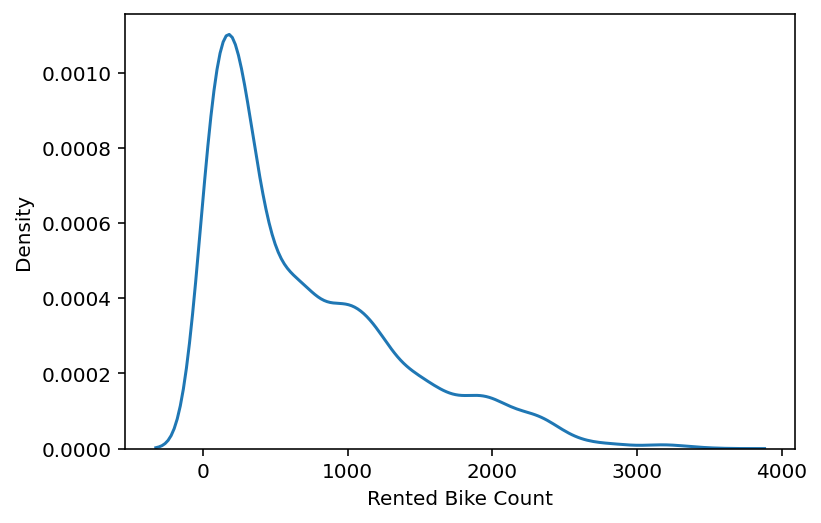

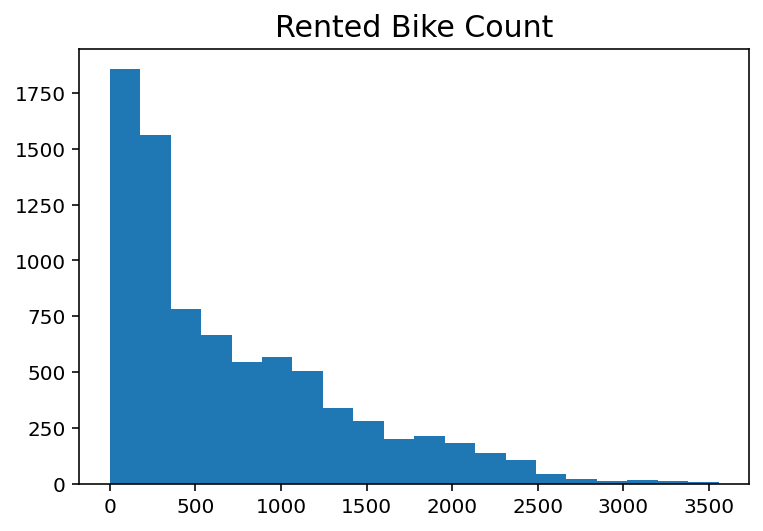

In [23]:
sns.kdeplot(df1['Rented Bike Count']) 
plt.show()

plt.hist(x='Rented Bike Count', data=df1, bins=20)
plt.title('Rented Bike Count', fontsize=15)
plt.show()

In [24]:
df1['Rented Bike Count'].isna().sum()

0

In [25]:
df1['Rented Bike Count'].describe()

count    8040.000000
mean      709.775995
std       657.320605
min         0.000000
25%       191.000000
50%       485.000000
75%      1080.500000
max      3556.000000
Name: Rented Bike Count, dtype: float64

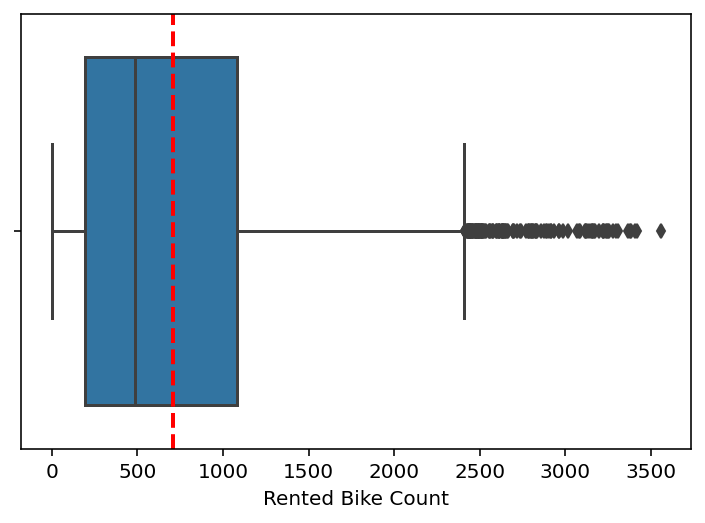

In [26]:
# 자전거 대여량에 대한 박스 플롯 _이상치 확인
sns.boxplot(x=df1['Rented Bike Count'])
plt.axvline(df1['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=2) #평균
plt.show()

In [27]:
Q1 = df1['Rented Bike Count'].quantile(0.25)
Q3 = df1['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1[(df1['Rented Bike Count']<upper_bound)&(df1['Rented Bike Count']>lower_bound)]

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
744,2018-01-01,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday,Yes,새벽
745,2018-01-01,230,1,NaN,41,NaN,2000,-14.7,0.0,0.0,0.0,Winter,Holiday,Yes,새벽
746,2018-01-01,178,2,-3.7,42,0.9,2000,-14.7,0.0,0.0,0.0,Winter,Holiday,Yes,새벽
747,2018-01-01,119,3,-4.0,44,1.0,2000,-14.4,0.0,0.0,0.0,Winter,Holiday,Yes,새벽
748,2018-01-01,62,4,NaN,53,1.1,1994,-12.3,0.0,0.0,0.0,Winter,Holiday,Yes,새벽
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2017-12-31,163,19,0.0,31,2.2,2000,-15.1,0.0,0.0,0.0,Winter,Holiday,Yes,밤
740,2017-12-31,161,20,-1.0,32,0.9,2000,-15.6,0.0,0.0,0.0,NaN,Holiday,Yes,밤
741,2017-12-31,179,21,-1.6,35,1.0,2000,-15.1,0.0,0.0,0.0,Winter,Holiday,Yes,밤
742,2017-12-31,155,22,-2.1,36,1.7,2000,-15.2,0.0,0.0,0.0,NaN,Holiday,Yes,밤


# Temperature(째C)	 
### train data 결측치 개수 : 800개
### test data 결측치 개수 : 76개
#### 박스플롯으로 확인해봤을 때 이상치는 없어보임

##### < 결측치 대체 방법 >
- 시간을 '새벽, 아침, 낮, 밤' 시간대별로 나누어 시간대별 평균온도로 결측치 대체
- 시간대별로 온도차이가 많이 나기 때문에 전체 온도 평균보다는 시간대별로 나누어서 온도 결측치 대체

In [28]:
df1[df1['Temperature(째C)'].isna()] #train data 결측치

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
745,2018-01-01,230,1,NaN,41,NaN,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes,새벽
748,2018-01-01,62,4,NaN,53,1.1,1994,-12.3,0.00,0.0,0.0,Winter,Holiday,Yes,새벽
752,2018-01-01,89,8,NaN,55,1.0,2000,-12.6,0.00,0.0,0.0,Winter,Holiday,Yes,아침
1491,2018-02-01,81,3,NaN,57,1.6,1874,-13.3,0.00,0.0,1.6,Winter,No Holiday,Yes,새벽
1506,2018-02-01,542,18,NaN,28,1.9,2000,-17.2,0.08,0.0,0.0,Winter,No Holiday,Yes,밤
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,2018-10-31,141,5,NaN,74,NaN,2000,-0.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,새벽
8025,2018-10-31,996,9,NaN,56,1.8,1825,-2.9,0.89,0.0,0.0,Autumn,No Holiday,Yes,아침
8027,2018-10-31,818,11,NaN,41,2.6,1907,-3.8,1.96,0.0,0.0,Autumn,No Holiday,Yes,아침
8031,2018-10-31,994,15,NaN,35,NaN,1908,-3.0,1.72,0.0,0.0,Autumn,No Holiday,Yes,낮


In [29]:
df2[df2['Temperature(째C)'].isna()] #test data 결측치

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
20,2018-11-01,20,NaN,53,1.7,1868,0.7,0.0,0.0,0.0,Autumn,No Holiday,Yes,밤
31,2018-11-02,7,NaN,75,0.8,1143,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,아침
50,2018-11-03,2,NaN,68,1.2,1170,2.0,0.0,0.0,0.0,Autumn,No Holiday,No,새벽
55,2018-11-03,7,NaN,79,1.3,894,1.8,0.0,0.0,0.0,Autumn,No Holiday,No,아침
58,2018-11-03,10,NaN,49,0.7,957,0.6,1.4,0.0,0.0,Autumn,No Holiday,No,아침
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2018-11-29,18,NaN,46,0.9,1566,-4.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,밤
691,2018-11-29,19,NaN,48,1.9,1590,-4.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,밤
692,2018-11-29,20,NaN,54,1.3,1434,-4.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,밤
695,2018-11-29,23,NaN,56,1.9,1394,-5.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,밤


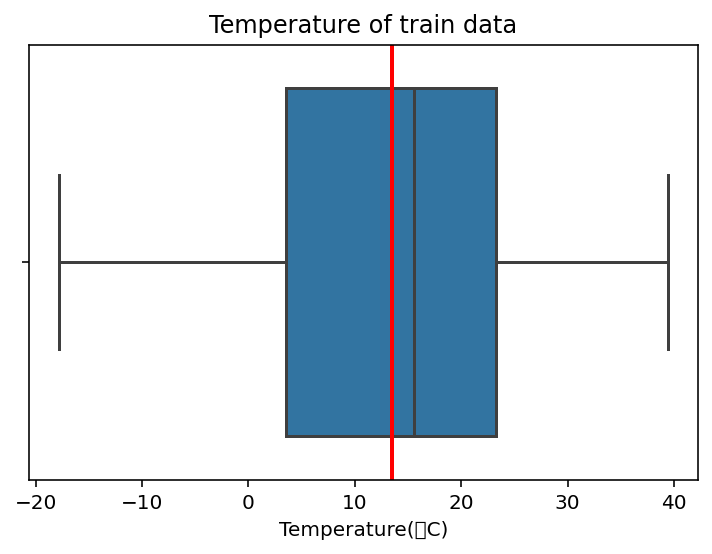

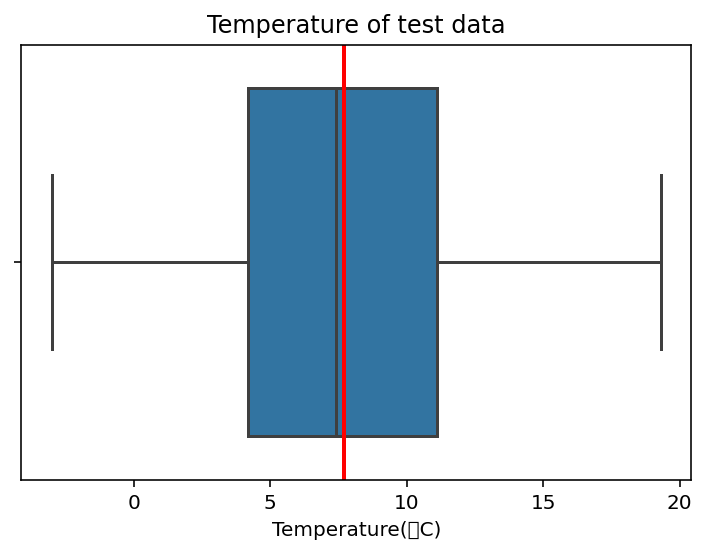

In [30]:
# 이상치 확인 _ 박스 플롯 : 이상치 발견 X
sns.boxplot(df1['Temperature(째C)'])
plt.title("Temperature of train data")
plt.axvline(df1['Temperature(째C)'].mean(), color='red',linewidth=2)
plt.show()

sns.boxplot(df2['Temperature(째C)'])
plt.title("Temperature of test data")
plt.axvline(df2['Temperature(째C)'].mean(), color='red',linewidth=2)

In [31]:
#시간별 온도
print(df1.groupby('Hour')['Temperature(째C)'].mean()) #train
print(df2.groupby('Hour')['Temperature(째C)'].mean()) #test

Hour
0     12.000654
1     11.752508
2     11.816611
3     10.841722
4     10.597959
5     10.462058
6     10.152174
7     10.322034
8     10.704902
9     12.058497
10    13.345704
11    14.949836
12    16.568197
13    16.560784
14    17.315385
15    17.908581
16    17.456811
17    16.649186
18    15.941176
19    14.871053
20    13.653443
21    13.080000
22    12.577703
23    12.158086
Name: Temperature(째C), dtype: float64
Hour
0      6.388462
1      5.846429
2      5.696429
3      5.085185
4      4.944444
5      4.359259
6      4.341379
7      3.657692
8      4.066667
9      5.032143
10     7.704000
11     9.629630
12    10.920000
13    12.514286
14    12.151852
15    12.137037
16    11.786207
17    10.428000
18    10.185185
19     8.960714
20     8.550000
21     7.472000
22     7.325000
23     7.017857
Name: Temperature(째C), dtype: float64


In [32]:
# 시간대별 온도
print(df1.groupby('Time')['Temperature(째C)'].mean()) #train
print(df2.groupby('Time')['Temperature(째C)'].mean()) #test

Time
낮     17.073202
밤     13.726829
새벽    11.244732
아침    11.925305
Name: Temperature(째C), dtype: float64
Time
낮     11.627044
밤      8.246875
새벽     5.385276
아침     5.705556
Name: Temperature(째C), dtype: float64


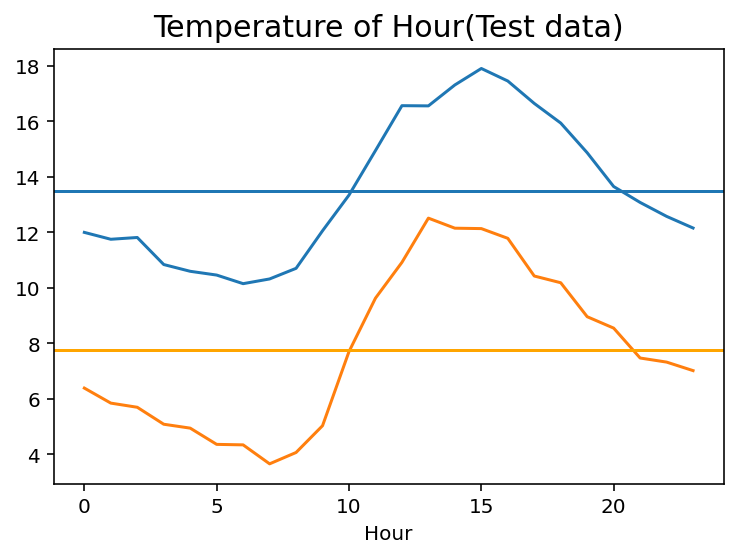

In [33]:
df1.groupby('Hour')['Temperature(째C)'].mean().plot()
plt.title("Temperature of Hour(Train data)", fontsize=15)
plt.axhline(df1.groupby('Hour')['Temperature(째C)'].mean().mean())
plt.show

df2.groupby('Hour')['Temperature(째C)'].mean().plot()
plt.title("Temperature of Hour(Test data)", fontsize=15)
plt.axhline(df2.groupby('Hour')['Temperature(째C)'].mean().mean(),color='orange')

In [34]:
# 'Temperature(째C)' 열 결측치 시간대별 평균 기온으로 대체
## train data
df1.loc[(df1['Time'] == '새벽') & (df1['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 10.8
df1.loc[(df1['Time'] == '아침') & (df1['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 11.4
df1.loc[(df1['Time'] == '낮') & (df1['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 16.6
df1.loc[(df1['Time'] == '밤') & (df1['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 13.3

## test data
df2.loc[(df2['Time'] == '새벽') & (df2['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 10.8
df2.loc[(df2['Time'] == '아침') & (df2['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 11.4
df2.loc[(df2['Time'] == '낮') & (df2['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 16.6
df2.loc[(df2['Time'] == '밤') & (df2['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 13.3

결측치 제거 확인

In [35]:
#train data
df1[df1['Temperature(째C)'].isna()] 

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time


In [36]:
#test data
df2[df2['Temperature(째C)'].isna()]

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time



# Seasons (계절)
- Spring, Summer, Autumn, Winter  
- 대여량 차이 : 여름 > 가을 > 봄 > 겨울
- 이상치, 결측치 존재

### train data 결측치 개수 : 802개
### test data 결측치 개수 : 74개
##### < 결측치 대체 방법 > _ 달별로 대체
- 봄 : 3-5월
- 여름 : 6-8월
- 가을 : 9-11월
- 겨울 : 12-2월

In [37]:
#결측치 개수 확인
print(df1['Seasons'].isna().sum()) #train data
print(df2['Seasons'].isna().sum()) #test data

802
74


In [38]:
# 'Seasons' 결측치 : 달 별로 계절 결정

# train data
df1.loc[(df1['Date'].dt.month.isin([3, 4, 5])), 'Seasons'] = 'Spring'
df1.loc[(df1['Date'].dt.month.isin([6, 7, 8])), 'Seasons'] = 'Summer'
df1.loc[(df1['Date'].dt.month.isin([9, 10, 11])), 'Seasons'] = 'Autumn'
df1.loc[(df1['Date'].dt.month.isin([1, 2, 12])), 'Seasons'] = 'Winter'

# test data
df2.loc[(df2['Date'].dt.month.isin([3, 4, 5])), 'Seasons'] = 'Spring'
df2.loc[(df2['Date'].dt.month.isin([6, 7, 8])), 'Seasons'] = 'Summer'
df2.loc[(df2['Date'].dt.month.isin([9, 10, 11])), 'Seasons'] = 'Autumn'
df2.loc[(df2['Date'].dt.month.isin([1, 2, 12])), 'Seasons'] = 'Winter'

In [39]:
#결측치 제거 확인
print(df1['Seasons'].isna().sum()) #train data
print(df2['Seasons'].isna().sum()) #test data

0
0


# Wind speed (m/s) : 풍속
### train data 결측치 개수 : 802개
### test data 결측치 개수 : 74개 
- test data 풍속 결측치 계절은 모두 가을
#### < Wind speed (m/s) 결측치 대체 방법 >
- 계절별 풍속 평균치로 대체

In [40]:
# train data 결측치 확인
df1[df1['Wind speed (m/s)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
745,2018-01-01,230,1,10.8,41,NaN,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes,새벽
755,2018-01-01,169,11,0.1,27,NaN,1874,-16.7,0.84,0.0,0.0,Winter,Holiday,Yes,아침
757,2018-01-01,248,13,2.4,22,NaN,1921,-17.2,1.10,0.0,0.0,Winter,Holiday,Yes,낮
766,2018-01-01,168,22,-1.3,48,NaN,1927,-10.9,0.00,0.0,0.0,Winter,Holiday,Yes,밤
1489,2018-02-01,149,1,-5.4,54,NaN,1996,-13.2,0.00,0.0,1.6,Winter,No Holiday,Yes,새벽
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,2018-10-31,994,15,16.6,35,NaN,1908,-3.0,1.72,0.0,0.0,Autumn,No Holiday,Yes,낮
8032,2018-10-31,1185,16,11.8,34,NaN,1979,-3.5,1.16,0.0,0.0,Autumn,No Holiday,Yes,낮
8034,2018-10-31,2094,18,13.3,48,NaN,2000,-1.0,0.03,0.0,0.0,Autumn,No Holiday,Yes,밤
8035,2018-10-31,1507,19,8.4,53,NaN,2000,-0.6,0.00,0.0,0.0,Autumn,No Holiday,Yes,밤


In [41]:
# test data 결측치 확인
df2[df2['Wind speed (m/s)'].isna()]

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
2,2018-11-01,2,4.4,64,NaN,2000,-1.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,새벽
12,2018-11-01,12,12.6,36,NaN,1785,-2.1,2.14,0.0,0.0,Autumn,No Holiday,Yes,낮
18,2018-11-01,18,11.8,43,NaN,1995,-0.3,0.03,0.0,0.0,Autumn,No Holiday,Yes,밤
32,2018-11-02,8,4.7,72,NaN,1306,0.0,0.12,0.0,0.0,Autumn,No Holiday,Yes,아침
43,2018-11-02,19,12.8,40,NaN,1870,-0.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,밤
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2018-11-27,12,9.3,61,NaN,390,2.1,0.85,0.0,0.0,Autumn,No Holiday,Yes,낮
637,2018-11-27,13,11.0,60,NaN,411,3.5,0.85,0.0,0.0,Autumn,No Holiday,Yes,낮
655,2018-11-28,7,2.5,24,NaN,1306,-16.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,아침
670,2018-11-28,22,3.2,34,NaN,1787,-11.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,밤


In [42]:
#결측치 개수 확인
print(df1['Wind speed (m/s)'].isna().sum()) #train data
print(df2['Wind speed (m/s)'].isna().sum()) #test data

802
74


Seasons
Autumn    1.551109
Spring    1.867199
Summer    1.615158
Winter    1.928149
Name: Wind speed (m/s), dtype: float64


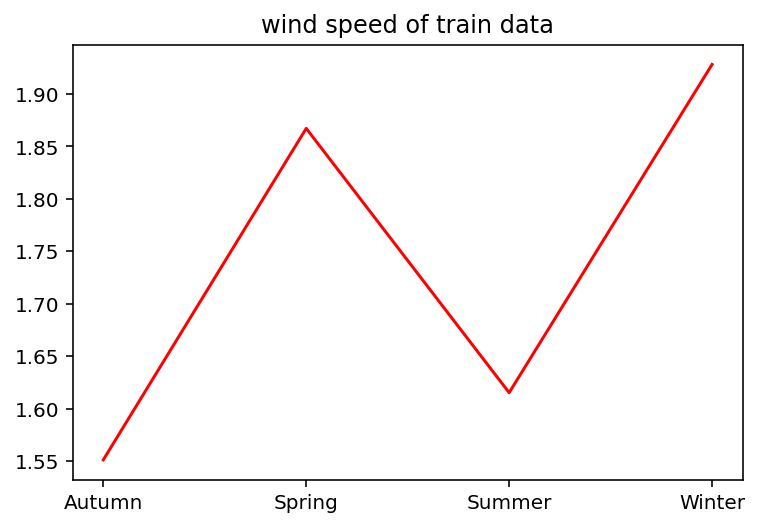

Seasons
Autumn    1.396285
Name: Wind speed (m/s), dtype: float64


Text(0.5, 1.0, 'wind speed of test data')

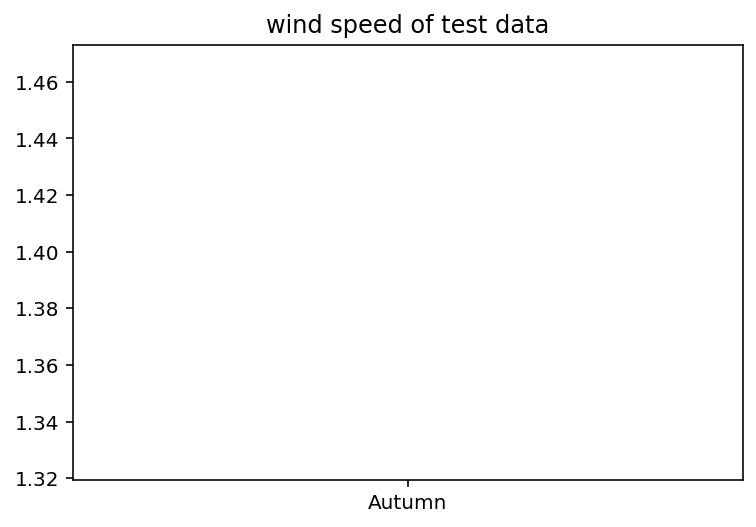

In [43]:
# 계절에 따른 풍속 시각화
print(df1.groupby('Seasons')['Wind speed (m/s)'].mean())

plt.plot(df1.groupby('Seasons')['Wind speed (m/s)'].mean(),color='red')
plt.title('wind speed of train data')
plt.show()

print(df2.groupby('Seasons')['Wind speed (m/s)'].mean())
plt.plot(df2.groupby('Seasons')['Wind speed (m/s)'].mean())
plt.title('wind speed of test data')

### 계절별 평균 풍속 (소수점 첫째까지 반올림)
#### train data
- Spring    1.9
- Summer    1.6
- Autumn    1.6
- Winter    1.9
#### test data
- Autumn    1.4

In [44]:
# 'Wind speed (m/s)' 결측치 계절별 평균 풍속으로 대체
df1.loc[(df1['Seasons'] == 'Spring') & (df1['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.9
df1.loc[(df1['Seasons'] == 'Summer') & (df1['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.6
df1.loc[(df1['Seasons'] == 'Autumn') & (df1['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.6
df1.loc[(df1['Seasons'] == 'Winter') & (df1['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.9

df2.loc[(df2['Seasons'] == 'Autumn') & (df2['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.4

In [45]:
#결측치 제거 확인
print(df1['Wind speed (m/s)'].isna().sum()) #train data
print(df2['Wind speed (m/s)'].isna().sum()) #test data

0
0


# Rented Bike Count_자전거 대여량

## 계절 ( Seasons )
- 계절별 평균 대여량 : 여름 > 가을 > 봄 >>>> 겨울
- 겨울에 대여량이 현저히 적다 ( 기온이 낮아서로 예상 )

In [46]:
df1[['Seasons']].value_counts()

Seasons
Spring     2208
Summer     2208
Winter     2160
Autumn     1464
dtype: int64

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

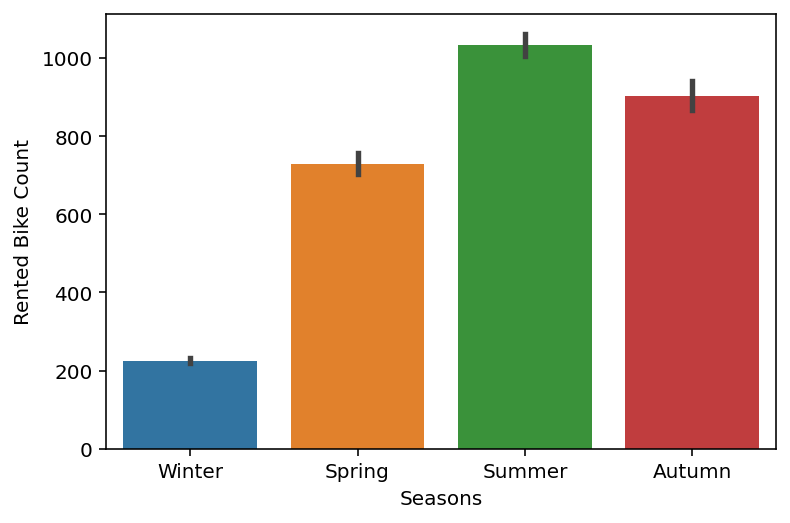

In [47]:
sns.barplot(data = df1, x= 'Seasons', y='Rented Bike Count')

In [48]:
#계절별 자전거 대여 횟수 평균
season_count=df1[['Seasons','Rented Bike Count']].groupby('Seasons').agg(['mean', 'std'])
season_count

Rented Bike Count            
                     mean         std
Seasons                              
Autumn         904.567623  704.170328
Spring         730.031250  621.509635
Summer        1034.073370  690.244759
Winter         225.541204  150.372236

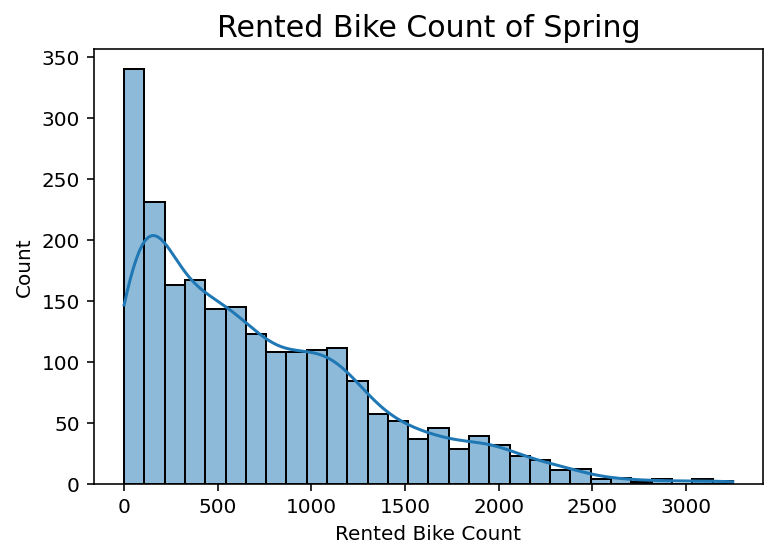

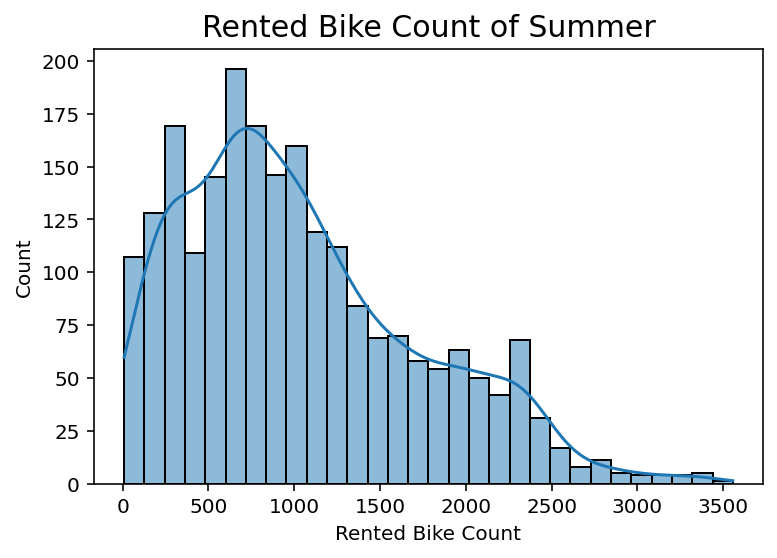

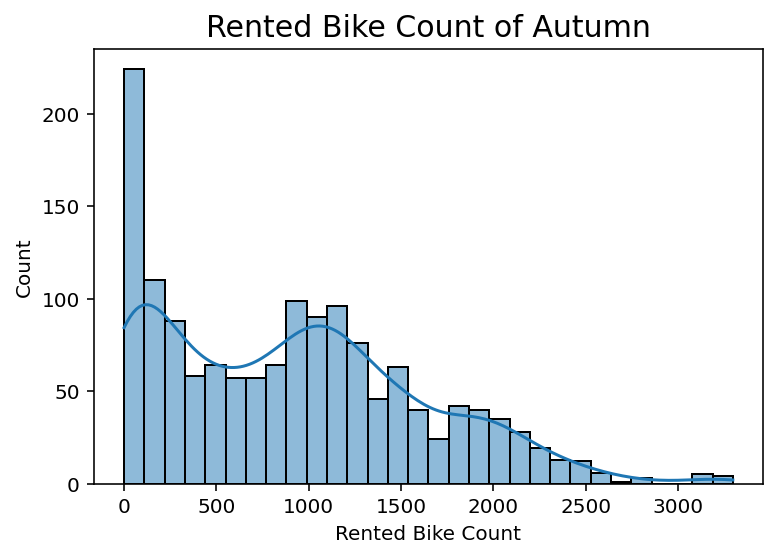

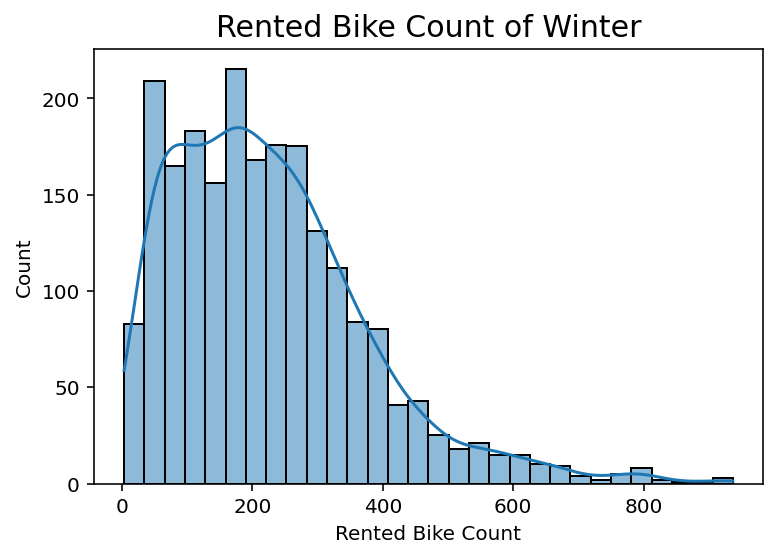

In [49]:
#봄
sns.histplot(df1[df1['Seasons']=='Spring']['Rented Bike Count'], bins=30,kde=True)
plt.title("Rented Bike Count of Spring", fontsize=15)
plt.show()

#여름
sns.histplot(df1[df1['Seasons']=='Summer']['Rented Bike Count'], bins=30,kde=True)
plt.title("Rented Bike Count of Summer", fontsize=15)
plt.show()

#가을
sns.histplot(df1[df1['Seasons']=='Autumn']['Rented Bike Count'], bins=30,kde=True)
plt.title("Rented Bike Count of Autumn", fontsize=15)
plt.show()

#겨울
sns.histplot(df1[df1['Seasons']=='Winter']['Rented Bike Count'], bins=30,kde=True)
plt.title("Rented Bike Count of Winter", fontsize=15)
plt.show()

## 날짜 (Date)
- 날짜 형식으로 변형 완료

In [50]:
df1.Date

744   2018-01-01
745   2018-01-01
746   2018-01-01
747   2018-01-01
748   2018-01-01
         ...    
739   2017-12-31
740   2017-12-31
741   2017-12-31
742   2017-12-31
743   2017-12-31
Name: Date, Length: 8040, dtype: datetime64[ns]

In [51]:
# 자전거 대여 횟수의 날짜당 평균
date_mean = df1[['Date','Rented Bike Count']].groupby('Date').mean()

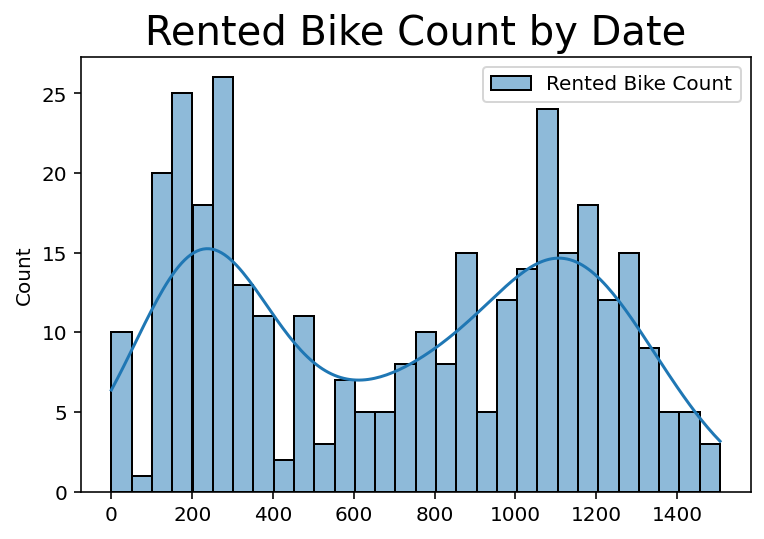

In [52]:
sns.histplot(date_mean, bins=30, kde=True) # 히스토그램
plt.title('Rented Bike Count by Date', fontsize=20)
plt.show()

## 시간 (Hour)
- 시간별 대여된 자전거 수
- 8시, 18시에 대여 수가 가장 많다. (출퇴근시간 이용 수 증가 예상)
- 23시~6시에 대여수는 다른 시간대에 비해 적다.

In [53]:
df1.groupby('Hour')['Rented Bike Count'].mean()

Hour
0      547.307463
1      429.650746
2      304.826866
3      205.262687
4      133.791045
5      141.110448
6      290.238806
7      604.826866
8     1002.683582
9      641.728358
10     526.376119
11     600.346269
12     699.752239
13     734.232836
14     760.704478
15     832.638806
16     936.698507
17    1146.785075
18    1514.573134
19    1213.970149
20    1091.002985
21    1053.498507
22     939.161194
23     683.456716
Name: Rented Bike Count, dtype: float64

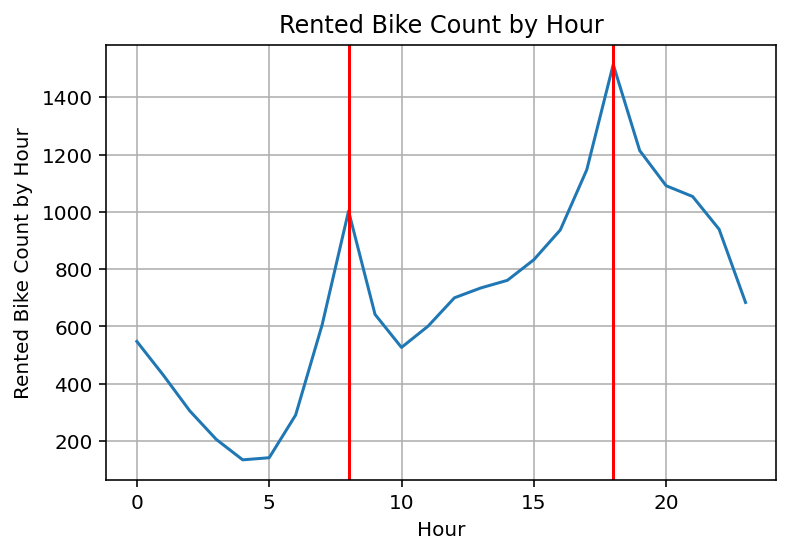

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

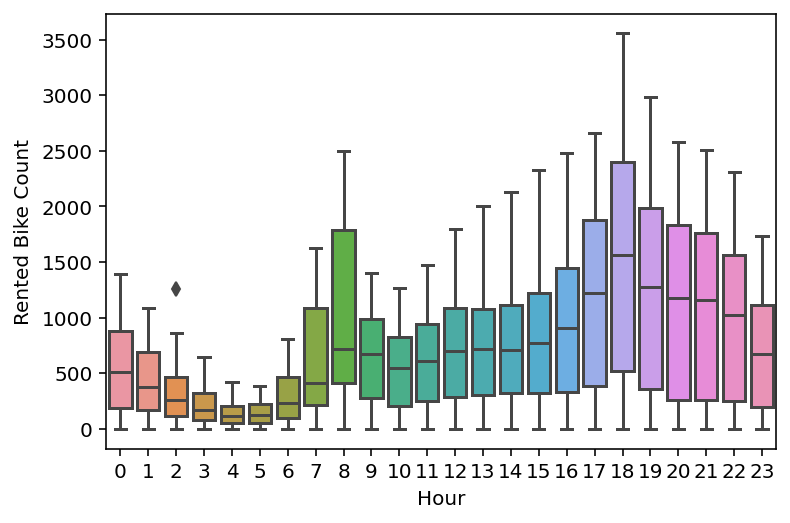

In [54]:
# 시간별 자전거 대여량 그래프
plt.plot(df1.groupby('Hour')['Rented Bike Count'].mean()) 
plt.grid()
plt.title("Rented Bike Count by Hour")
plt.xlabel("Hour",fontsize=10)
plt.ylabel("Rented Bike Count by Hour",fontsize=10)

plt.axvline(8,color='red')
plt.axvline(18,color='red')
plt.show()

# 박스플럿
sns.boxplot(df1['Hour'],df1['Rented Bike Count'])

# 온도 (Temperature) 

In [55]:
df1['Temperature(째C)'].describe()

count    8040.000000
mean       13.445970
std        11.666098
min       -17.800000
25%         4.800000
50%        14.300000
75%        22.400000
max        39.400000
Name: Temperature(째C), dtype: float64

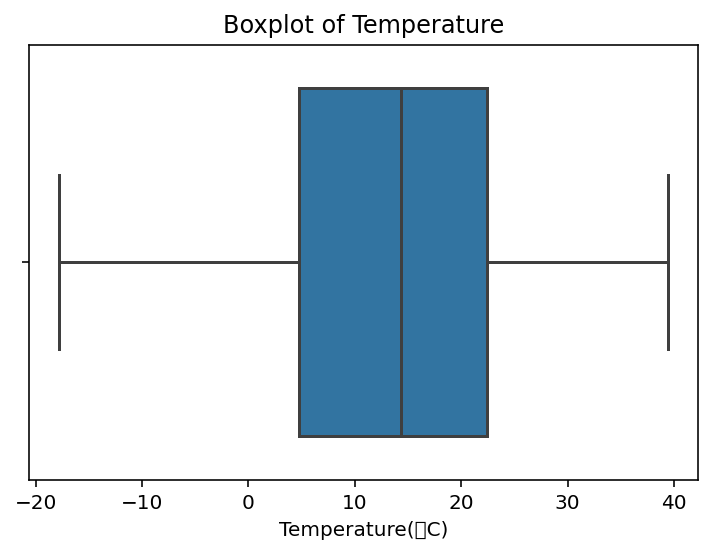

In [56]:
sns.boxplot(df1['Temperature(째C)'])
plt.title('Boxplot of Temperature')
plt.show()

# Dew point Temperature
- 기온과 높은 상관관계를 가짐

In [57]:
#기술통계량
df1['Dew point temperature(째C)'].describe()

count    8040.000000
mean        4.522239
std        13.393517
min       -30.600000
25%        -4.600000
50%         6.400000
75%        15.600000
max        27.200000
Name: Dew point temperature(째C), dtype: float64

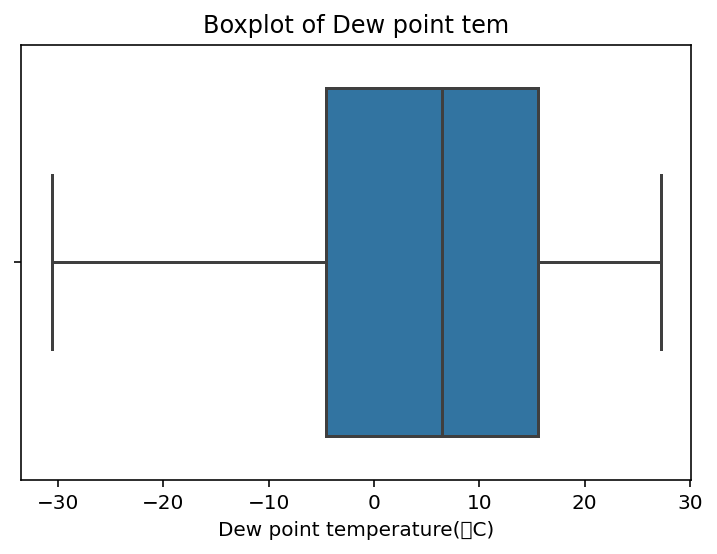

In [58]:
#박스플롯
sns.boxplot(df1['Dew point temperature(째C)'])
plt.title('Boxplot of Dew point tem')
plt.show()

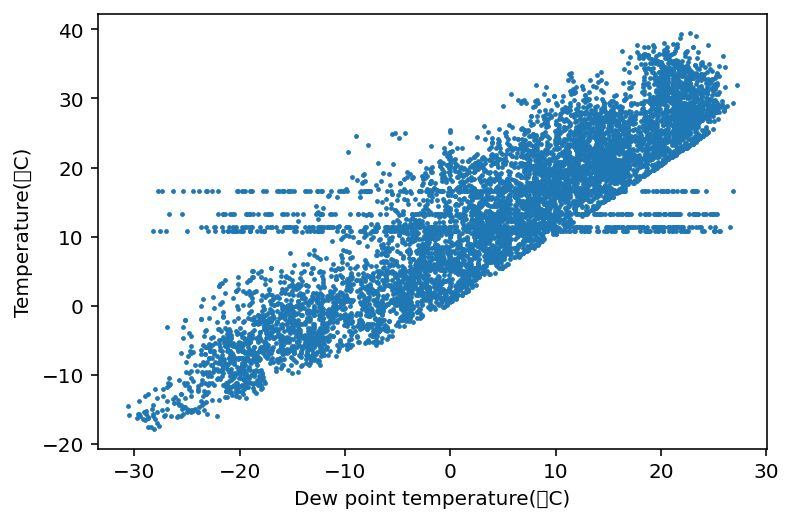

In [59]:
# 이슬점 온도, 기온 : 높은 상관관계
plt.scatter(df1['Dew point temperature(째C)'],df1['Temperature(째C)'],s=2)
plt.xlabel('Dew point temperature(째C)')
plt.ylabel('Temperature(째C)')
plt.show()


## 습도 (Humidity(%))
- 자전거 대여량과 큰 관계가 있어보이지 않는다.

In [60]:
#기술통게량
df1['Humidity(%)'].describe()

count    8040.000000
mean       58.271020
std        20.340492
min         0.000000
25%        43.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity(%), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

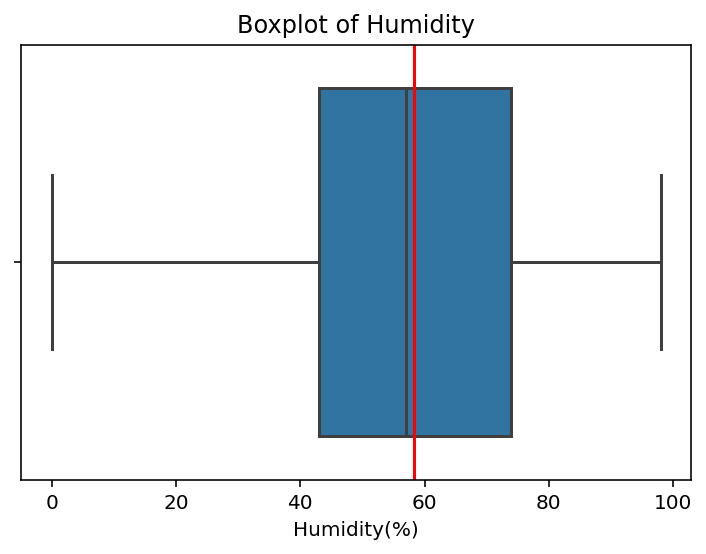

In [61]:
# 박스플롯 _ 이상치 확인
sns.boxplot(df1['Humidity(%)'])
plt.title('Boxplot of Humidity')
plt.axvline(df1['Humidity(%)'].mean(), color='red')
plt.show

In [62]:
#계절별 습도 
df1[df1['Seasons']=='Spring']['Humidity(%)']
df1[df1['Seasons']=='Summer']['Humidity(%)']
df1[df1['Seasons']=='Autumn']['Humidity(%)']
df1[df1['Seasons']=='Winter']['Humidity(%)']

744    40
745    41
746    42
747    44
748    53
       ..
739    31
740    32
741    35
742    36
743    40
Name: Humidity(%), Length: 2160, dtype: int64

## 풍속 ( Wind speed (m/s) ) 
- 자전거 대여량과 큰 관계가 없어보인다

In [63]:
# 기술통계량
df1['Wind speed (m/s)'].describe()

count    8040.000000
mean        1.757388
std         0.993483
min         0.000000
25%         1.000000
50%         1.600000
75%         2.300000
max         7.400000
Name: Wind speed (m/s), dtype: float64

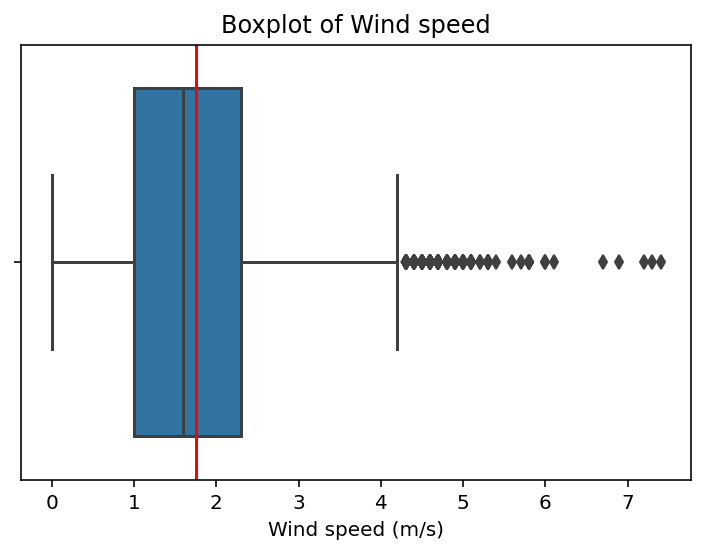

In [64]:
# 박스플롯
sns.boxplot(df1['Wind speed (m/s)'])
plt.title('Boxplot of Wind speed')
plt.axvline(df1['Wind speed (m/s)'].mean(), color='red')
plt.show()

In [65]:
# 계절별 평균습도
df1.groupby("Seasons")['Wind speed (m/s)'].mean().sort_values()

Seasons
Autumn    1.556352
Summer    1.613723
Spring    1.870245
Winter    1.925139
Name: Wind speed (m/s), dtype: float64

Seasons
Autumn    1.556352
Spring    1.870245
Summer    1.613723
Winter    1.925139
Name: Wind speed (m/s), dtype: float64


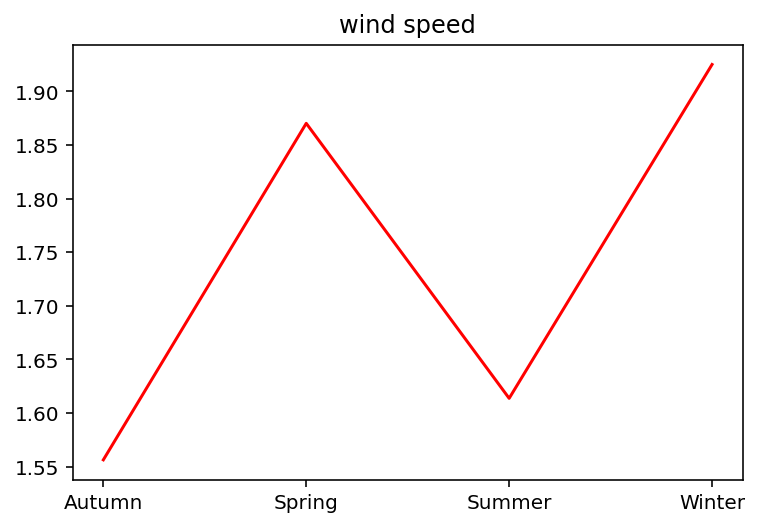

In [66]:
# 계절에 따른 풍속 시각화
print(df1.groupby('Seasons')['Wind speed (m/s)'].mean())

plt.plot(df1.groupby('Seasons')['Wind speed (m/s)'].mean(),color='red')
plt.title('wind speed')
plt.show()

## Visibility (10m)
- Visibility (10m) 봄 : 봄에는 기온이 상승, 습도가 증가하는 경향이 있음. 이러한 경우에 안개가 발생할 가능성이 높아져 가시성이 감소
- Visibility (10m) 가을 : 가을에는 기온이 하강, 공기가 맑고 건조해져 안개가 적어지고 가시성이 증가

In [67]:
df1['Visibility (10m)']

744    1358
745    2000
746    2000
747    2000
748    1994
       ... 
739    2000
740    2000
741    2000
742    2000
743    2000
Name: Visibility (10m), Length: 8040, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe88b5f160>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe88b5f820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe88b5f100>],
 'medians': [<matplotlib.lines.Line2D at 0x1feffd2b940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1feffd2bf70>],
 'means': []}

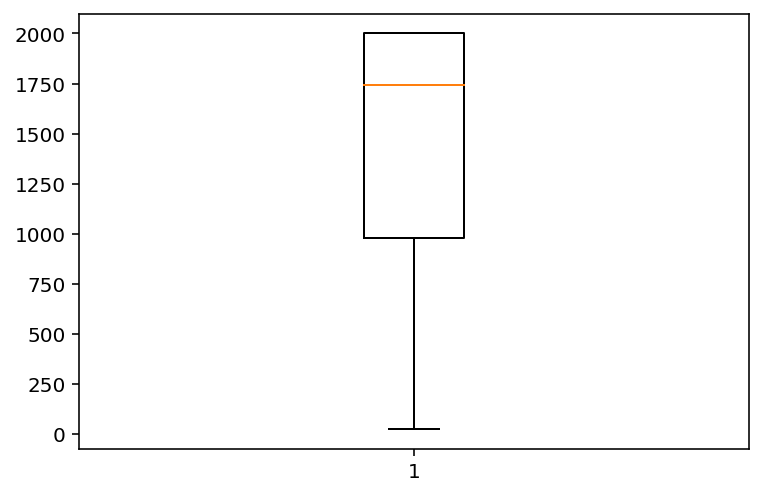

In [68]:
plt.boxplot(df1['Visibility (10m)'])

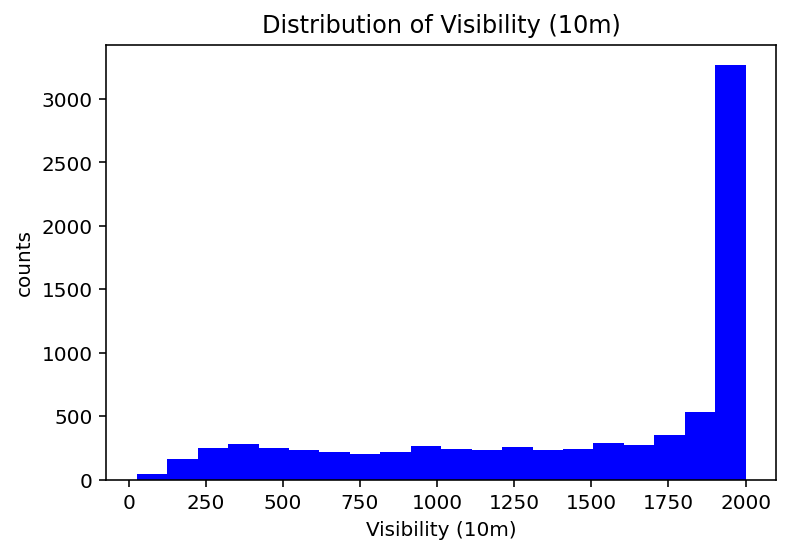

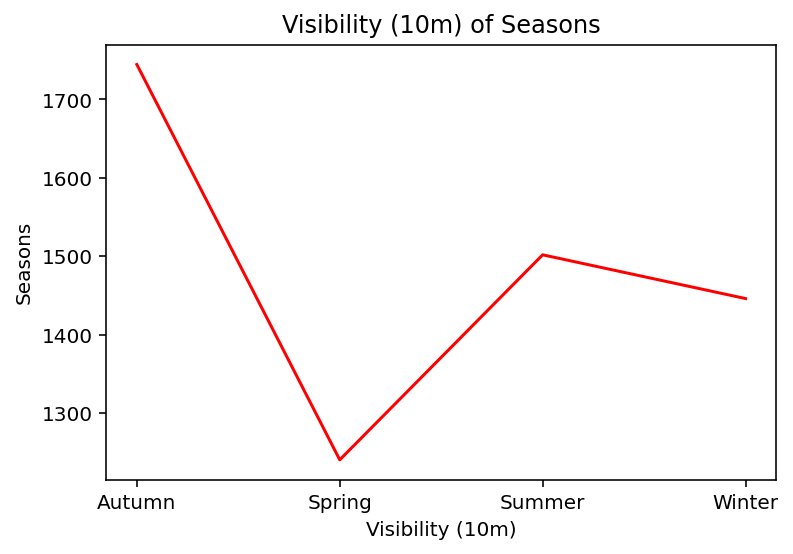

(array([344., 391., 431., 300., 158.,  67.,  26.,  10.,  15.,  10.]),
 array([   0. ,  255.8,  511.6,  767.4, 1023.2, 1279. , 1534.8, 1790.6,
        2046.4, 2302.2, 2558. ]),
 <BarContainer object of 10 artists>)

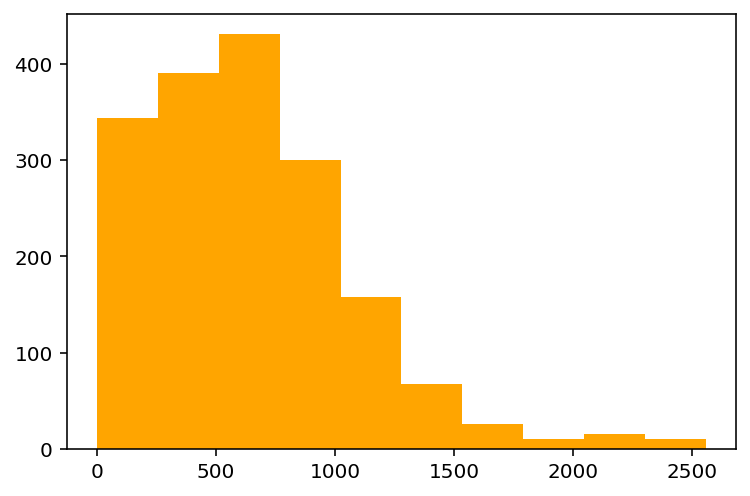

In [69]:
plt.hist(df1['Visibility (10m)'], bins=20, color='blue')
plt.title('Distribution of Visibility (10m)')
plt.xlabel('Visibility (10m)')
plt.ylabel('counts')
plt.show()

plt.plot(df1.groupby('Seasons')['Visibility (10m)'].mean(), color='red')
plt.title('Visibility (10m) of Seasons')
plt.xlabel('Visibility (10m)')
plt.ylabel('Seasons')
plt.show()

plt.hist(df1.groupby('Visibility (10m)')['Rented Bike Count'].mean(),color='orange')

In [70]:
#계절별 가시성
print(df1.groupby('Seasons')['Visibility (10m)'].mean())

Seasons
Autumn    1744.414617
Spring    1240.364583
Summer    1501.745471
Winter    1445.987037
Name: Visibility (10m), dtype: float64


Seasons
Autumn    16.818511
Spring    13.127627
Summer    25.432382
Winter    -0.767222
Name: Temperature(째C), dtype: float64


<AxesSubplot:xlabel='Seasons'>

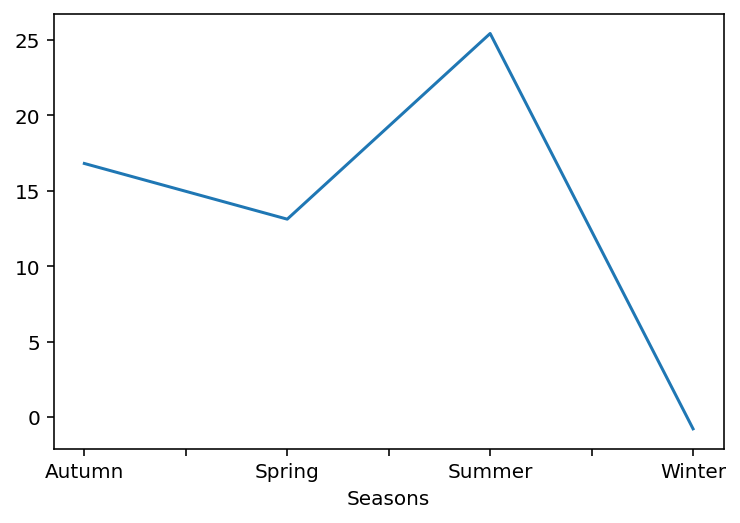

In [71]:
print(df1.groupby('Seasons')['Temperature(째C)'].mean())
df1.groupby('Seasons')['Temperature(째C)'].mean().plot()

## Snowfall (cm)
- 대기 중에서 수증기가 응결되어 내리는 적설량
- 자전거 대여량에 영향을 줌

In [72]:
df1['Snowfall (cm)'].describe().round(2)

count    8040.00
mean        0.07
std         0.38
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         5.10
Name: Snowfall (cm), dtype: float64

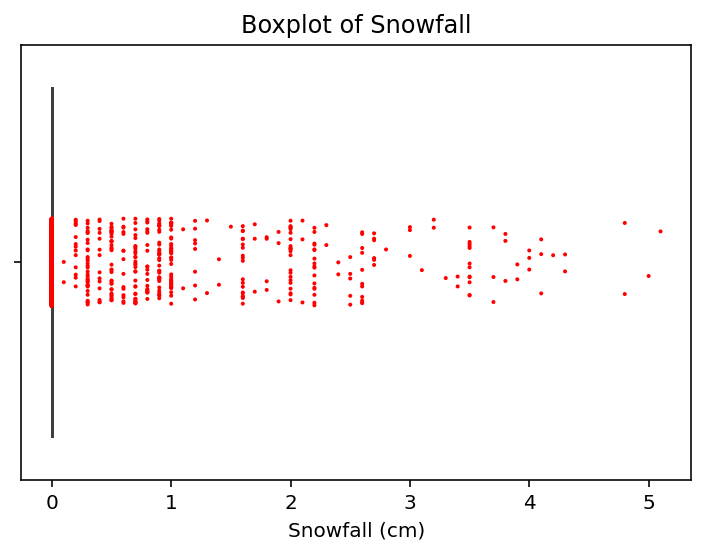

In [73]:
#박스플롯
sns.boxplot(df1['Snowfall (cm)'], showfliers=False)
sns.stripplot(df1['Snowfall (cm)'], color='red', marker='o', size=2)
plt.title('Boxplot of Snowfall')
plt.show()

In [74]:
#적설량과 평균 자전거대여횟수
df1.groupby('Snowfall (cm)')['Rented Bike Count'].mean()

Snowfall (cm)
0.0    738.093096
0.1    102.500000
0.2    203.428571
0.3    136.757576
0.4    135.571429
0.5    138.705882
0.6    185.000000
0.7    164.774194
0.8    226.666667
0.9    142.764706
1.0    163.000000
1.1    126.000000
1.2     54.375000
1.3    142.500000
1.4    214.500000
1.5    168.000000
1.6    198.473684
1.7    251.333333
1.8    219.000000
1.9    234.333333
2.0    190.500000
2.1    182.000000
2.2    183.117647
2.3    187.500000
2.4    181.000000
2.5    214.000000
2.6    105.909091
2.7    168.166667
2.8    171.000000
3.0    121.000000
3.1    119.000000
3.2    119.500000
3.3     72.000000
3.4    183.500000
3.5     82.916667
3.7    263.000000
3.8     92.000000
3.9     47.000000
4.0     42.333333
4.1     43.000000
4.2    116.000000
4.3     25.000000
4.8     40.000000
5.0     76.000000
5.1     62.000000
Name: Rented Bike Count, dtype: float64

## Rainfall(mm)
- 강수량이 증가할 가능성이 높음.

In [75]:
#기술통계량
df1['Rainfall(mm)'].describe()

count    8040.000000
mean        0.152164
std         1.127026
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

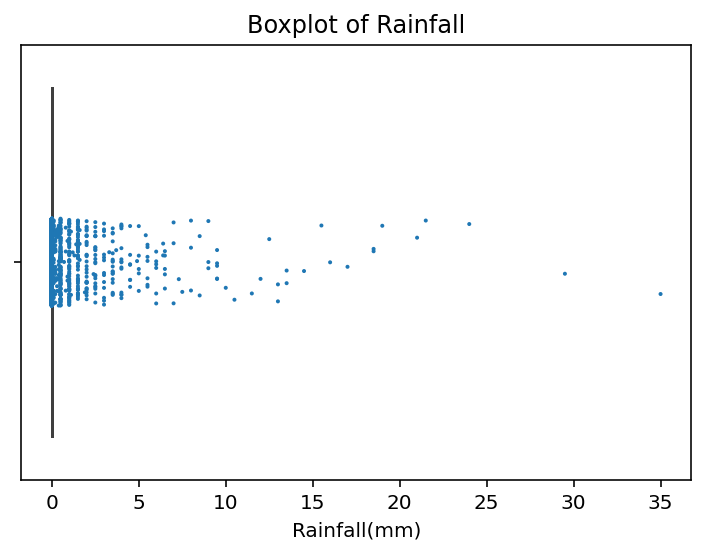

In [76]:
# 박스플롯
sns.boxplot(df1['Rainfall(mm)'], showfliers=False)
sns.stripplot(df1['Rainfall(mm)'], marker='o', size=2)
plt.title('Boxplot of Rainfall')
plt.show()

---
# 모델링

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8040 entries, 744 to 743
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(째C)            8040 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           8040 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(째C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Seasons                    8040 non-null   object        
 12  Holid

## 범주형 데이터 수치화

- 명목형 변수 : Date, Seasons, Holiday, Functioning Day
- 순서형 변수 : Hour
- 연속형 변수: Rented Bike Count, Temperature(째C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(째C), Solar Radiation (MJ/m2), Rainfall(mm),Snowfall (cm)


### one-hot 인코딩 
- 명목형 변수를 수치화할 때 사용

In [78]:
# Date, Seasons, Holiday, Functioning Day변수를 더미변수화
v1_dummy = pd.get_dummies(df1[["Date","Seasons","Holiday","Functioning Day"]])
v1_dummy

,Date,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
744,2018-01-01,0,0,0,1,1,0,0,1
745,2018-01-01,0,0,0,1,1,0,0,1
746,2018-01-01,0,0,0,1,1,0,0,1
747,2018-01-01,0,0,0,1,1,0,0,1
748,2018-01-01,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
739,2017-12-31,0,0,0,1,1,0,0,1
740,2017-12-31,0,0,0,1,1,0,0,1
741,2017-12-31,0,0,0,1,1,0,0,1
742,2017-12-31,0,0,0,1,1,0,0,1


In [79]:
#더미변수들을 데이터프레임에 합침
v1 = df1.copy()
v1 = pd.concat([v1, v1_dummy], axis=1)
v1

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),...,Time,Date,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
744,2018-01-01,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,...,새벽,2018-01-01,0,0,0,1,1,0,0,1
745,2018-01-01,230,1,10.8,41,1.9,2000,-14.7,0.0,0.0,...,새벽,2018-01-01,0,0,0,1,1,0,0,1
746,2018-01-01,178,2,-3.7,42,0.9,2000,-14.7,0.0,0.0,...,새벽,2018-01-01,0,0,0,1,1,0,0,1
747,2018-01-01,119,3,-4.0,44,1.0,2000,-14.4,0.0,0.0,...,새벽,2018-01-01,0,0,0,1,1,0,0,1
748,2018-01-01,62,4,10.8,53,1.1,1994,-12.3,0.0,0.0,...,새벽,2018-01-01,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2017-12-31,163,19,0.0,31,2.2,2000,-15.1,0.0,0.0,...,밤,2017-12-31,0,0,0,1,1,0,0,1
740,2017-12-31,161,20,-1.0,32,0.9,2000,-15.6,0.0,0.0,...,밤,2017-12-31,0,0,0,1,1,0,0,1
741,2017-12-31,179,21,-1.6,35,1.0,2000,-15.1,0.0,0.0,...,밤,2017-12-31,0,0,0,1,1,0,0,1
742,2017-12-31,155,22,-2.1,36,1.7,2000,-15.2,0.0,0.0,...,밤,2017-12-31,0,0,0,1,1,0,0,1


In [80]:
encoder = OneHotEncoder(sparse=False, drop='first')

# 'Date', 'Seasons', 'Holiday', 'Functioning Day' 열을 2차원 배열로 변환하여 인코딩
result = encoder.fit_transform(v1[["Date","Seasons","Holiday","Functioning Day"]])
result

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [81]:
encoder.categories_

[array(['2017-12-01T00:00:00.000000000', '2017-12-02T00:00:00.000000000',
        '2017-12-03T00:00:00.000000000', '2017-12-04T00:00:00.000000000',
        '2017-12-05T00:00:00.000000000', '2017-12-06T00:00:00.000000000',
        '2017-12-07T00:00:00.000000000', '2017-12-08T00:00:00.000000000',
        '2017-12-09T00:00:00.000000000', '2017-12-10T00:00:00.000000000',
        '2017-12-11T00:00:00.000000000', '2017-12-12T00:00:00.000000000',
        '2017-12-13T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
        '2017-12-15T00:00:00.000000000', '2017-12-16T00:00:00.000000000',
        '2017-12-17T00:00:00.000000000', '2017-12-18T00:00:00.000000000',
        '2017-12-19T00:00:00.000000000', '2017-12-20T00:00:00.000000000',
        '2017-12-21T00:00:00.000000000', '2017-12-22T00:00:00.000000000',
        '2017-12-23T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
        '2017-12-25T00:00:00.000000000', '2017-12-26T00:00:00.000000000',
        '2017-12-27T00:00:00.000000000

In [82]:
# 데이터 프레임
df_encoder = pd.DataFrame(result, columns=encoder.get_feature_names_out([["Date","Seasons","Holiday","Functioning Day"]]))

ValueError: input_features is not equal to feature_names_in_

In [84]:
# Date, Seasons, Holiday, Functioning Day 변수를 더미변수화
v1_dummy = pd.get_dummies(df1[["Date","Seasons","Holiday","Functioning Day"]])

# 더미변수들을 데이터프레임에 합침
v1 = df1.copy()
v1 = pd.concat([v1, v1_dummy], axis=1)

# OneHotEncoder 인스턴스 생성
encoder = OneHotEncoder(sparse=False, drop='first')

# 'Date', 'Seasons', 'Holiday', 'Functioning Day' 열을 2차원 배열로 변환하여 인코딩
result = encoder.fit_transform(v1[["Date","Seasons","Holiday","Functioning Day"]])

# 인코딩된 값을 데이터프레임으로 변환
df_encoder = pd.DataFrame(result, columns=encoder.get_feature_names_out(["Date","Seasons","Holiday","Functioning Day"]))

# 결과 출력
print(df_encoder)

## 계속 똑같은 오류가 나는 이유를 잘 모르겠습니다ㅜㅜ

ValueError: input_features is not equal to feature_names_in_

# 라벨 인코딩
- 순서형 변수 (Hour) 수치화

In [85]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

# 'Hour' 변수에 라벨 인코딩 적용
df1['Hour_LabelEncoded'] = label_encoder.fit_transform(df1['Hour'])

# 결과 확인
print(df1[['Hour', 'Hour_LabelEncoded']].head())

     Hour  Hour_LabelEncoded
744     0                  0
745     1                  1
746     2                  2
747     3                  3
748     4                  4


# train, valid, test 셋 분리

In [86]:
v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8040 entries, 744 to 743
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(째C)            8040 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           8040 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(째C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Seasons                    8040 non-null   object        
 12  Holid

In [87]:
# 필요없는 열 제거
columns_drop = ['Time', 'Seasons', 'Holiday', 'Functioning Day', 'Date']
df1_cleaned = df1.drop(columns=columns_drop)

In [88]:
#X(독립변수), y(종속변수) 분리
X = df1_cleaned.drop("Rented Bike Count", axis=1)
y = df1_cleaned["Rented Bike Count"]

In [98]:
# 클래스 분포 확인
print(df1_cleaned['Rented Bike Count'].value_counts())

0       223
103      18
223      18
262      18
189      17
       ... 
893       1
885       1
2098      1
873       1
2047      1
Name: Rented Bike Count, Length: 2138, dtype: int64


In [100]:
from sklearn.model_selection import train_test_split

# X(독립변수), y(종속변수) 분리
X = df1_cleaned.drop("Rented Bike Count", axis=1)
y = df1_cleaned["Rented Bike Count"] 

# train과 valid 셋 분리
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 각 셋의 크기 확인
print("Train set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Train set size: (6432, 10) (6432,)
Validation set size: (804, 10) (804,)
Test set size: (804, 10) (804,)


# 스케일링

## Standard Scaler
- 주어진 데이터의 특성에서 평균을 빼고 표준편차로 나누는 방법
- 표준 정규 분포를 갖도록 하는 스케일링 방법

In [101]:
#객체 생성
scaler = StandardScaler()

#학습 및 변환
X_train_ss = scaler.fit_transform(X_train)
X_val_ss = scaler.transform(X_val)
X_test_ss = ss.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_ss.mean()}\n분산: {X_train_ss.std()}')
print("<valid 셋>")
print(f'평균: {X_val_ss.mean()}\n분산: {X_val_ss.std()}')
print("<test 셋>")
print(f'평균: {X_test_ss.mean()}\n분산: {X_test_ss.std()}')

<train 셋>
평균: -5.0871413217898965e-17
분산: 1.0
<valid 셋>
평균: 0.014436527418682125
분산: 1.060440403692601
<test 셋>
평균: 0.018982153678910808
분산: 1.0522703614993838


## MinMax Scaler
- 데이터의 feature를 정규화 
- 데이터를 일정한 범위로 변환, 더 좋은 성능으로 돕는 기술
- 최솟값, 최댓값을 사용하여 데이터를 [0,1] 범위로 변환함

In [102]:
#객체 생성
mms = MinMaxScaler()

#학습 및 변환
X_train_mms = mms.fit_transform(X_train)
X_val_mms = mms.transform(X_val)
X_test_mms = mms.transform(X_test) 

print("<train 셋>")
print(f'최대: {X_train_mms.max()}\n최소: {X_train_mms.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mms.max()}\n최소: {X_val_mms.min()}')
print("<test 셋>")
print(f'최대: {X_test_mms.max()}\n최소: {X_test_mms.min()}')

<train 셋>
최대: 1.0000000000000002
최소: 0.0
<valid 셋>
최대: 1.0
최소: 0.0
<test 셋>
최대: 1.02
최소: -0.005272407732864692


## MaxAbs Scaler
- 주어진 데이터의 feature를 정규화
- 각 feature의 최댓값의 절댓값으로 나누어 스케일을 맞추는 방법
- 모든 데이터가 [-1,1] 로 매핑

In [105]:
#객체 생성
mas = MaxAbsScaler()

#학습 및 변환
X_train_mas = mas.fit_transform(X_train)
X_val_mas = mas.transform(X_val)
X_test_mas = mas.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mas.max()}\n최소: {X_train_mas.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mas.max()}\n최소: {X_val_mas.min()}')
print("<test 셋>")
print(f'최대: {X_test_mas.max()}\n최소: {X_test_mas.min()}')

<train 셋>
최대: 1.0
최소: -1.0
<valid 셋>
최대: 1.0
최소: -0.9640522875816993
<test 셋>
최대: 1.02
최소: -0.9705882352941175


## Robust Scaler
- 이상치에 강건한 특성을 갖는 정규화 방법
- 중앙값과 IQR 사용하여 스케일링

In [106]:
#객체 생성
rs = RobustScaler()

#학습 및 변환
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)
X_test_rs = rs.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_rs.mean()}\n분산: {X_train_rs.std()}')
print("<valid 셋>")
print(f'평균: {X_val_rs.mean()}\n분산: {X_val_rs.std()}')
print("<test 셋>")
print(f'평균: {X_test_rs.mean()}\n분산: {X_test_rs.std()}')

<train 셋>
평균: 0.06049292012127604
분산: 0.7356820834986911
<valid 셋>
평균: 0.06776204162005407
분산: 0.7609356168396849
<test 셋>
평균: 0.07079707304880602
분산: 0.8074069472380082
